<a href="https://colab.research.google.com/github/imanf18/UTS2-GA-ImanFushshilat-201012320033/blob/main/UTS2_Iman_Fushshilat_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Route: ['C', 'A', 'E', 'F', 'J', 'G', 'I', 'H', 'D', 'B']
Maximum Income: 30524.41735191093
Total Time: 119.47558264808907 minutes
Total Distance: 119.47558264808907 km


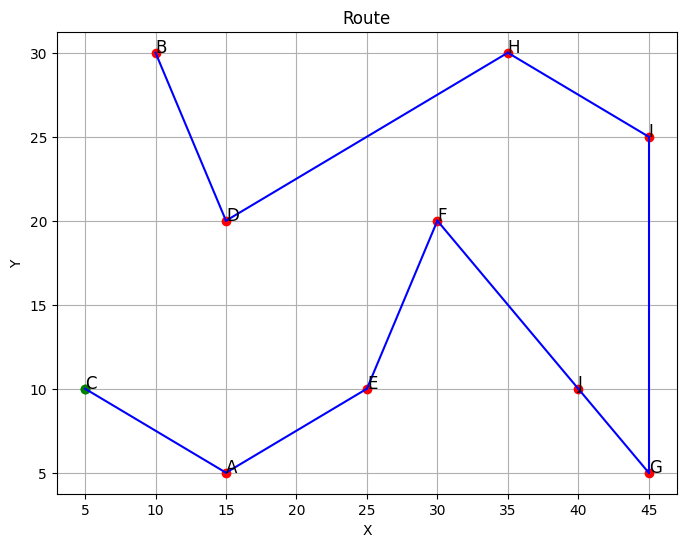

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

COORDINATES = {
    'A': (15, 5), 'B': (10, 30), 'C': (5, 10), 'D': (15, 20), 'E': (25, 10),
    'F': (30, 20), 'G': (45, 5), 'H': (35, 30), 'I': (45, 25), 'J': (40, 10)
}

PRIORITY_POINTS = {'F','G'}
SPECIAL_POINTS = {'A', 'I'}
SPECIAL_TIME_LIMIT = 3 * 60  # 3 jam dalam menit
PRIORITY_TIME_LIMIT = 2 * 60  # 2 jam dalam menit
COURIER_SPEED = 60  # km/jam
COST_PER_KM = 1000  # biaya per km
COURIER_MONEY = 50000  # uang yang dibawa kurir
FINE_RATE = 5000  # denda per 30 menit

DISTANCES = {}
for point1 in COORDINATES:
    for point2 in COORDINATES:
        if point1 != point2:
            distance = ((COORDINATES[point1][0] - COORDINATES[point2][0]) ** 2 +
                        (COORDINATES[point1][1] - COORDINATES[point2][1]) ** 2) ** 0.5
            DISTANCES[(point1, point2)] = distance

def calculate_income_route(route):
    income = 0
    distance = 0
    current_time = 0

    current_point = 'C'  # Titik awal
    for point in route:
        distance += DISTANCES[(current_point, point)]
        current_time += DISTANCES[(current_point, point)] / COURIER_SPEED * 60  # dalam menit

        if point in SPECIAL_POINTS and current_time > SPECIAL_TIME_LIMIT:
            income -= FINE_RATE * ((current_time - SPECIAL_TIME_LIMIT) // 30)
        elif point == 'F' or point == 'G' and current_time > PRIORITY_TIME_LIMIT:
            income -= FINE_RATE * ((current_time - PRIORITY_TIME_LIMIT) // 30)

        income += 15000  # Pendapatan untuk setiap titik yang dikirim

        current_point = point

    total_cost = distance * COST_PER_KM
    if income >= total_cost:
        income -= total_cost
    else:
        income = 0

    return income, current_time, distance

def generate_initial_population(population_size):
    population = []
    points = list(COORDINATES.keys())
    points.remove('C')  # Hapus titik awal dari daftar titik
    for _ in range(population_size):
        route = points[:]
        random.shuffle(route)
        population.append(route)
    return population

def tournament_selection(population, k=5):
    tournament = random.sample(population, k)
    return max(tournament, key=lambda x: calculate_income_route(x)[0])

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + [gene for gene in parent2 if gene not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [gene for gene in parent1 if gene not in parent2[:crossover_point]]
    return child1, child2

def mutation(route):
    mutated_route = route[:]
    index1, index2 = random.sample(range(len(route)), 2)
    mutated_route[index1], mutated_route[index2] = mutated_route[index2], mutated_route[index1]
    return mutated_route

def genetic_algorithm(population_size, generations):
    population = generate_initial_population(population_size)
    for _ in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            child1, child2 = crossover(parent1, parent2)
            if random.random() < 0.1:
                child1 = mutation(child1)
            if random.random() < 0.1:
                child2 = mutation(child2)
            new_population.extend([child1, child2])
        population = new_population
    best_route = max(population, key=lambda x: calculate_income_route(x)[0])
    max_income, total_time, total_distance = calculate_income_route(best_route)
    return best_route, max_income, total_time, total_distance

def plot_route(route):
    plt.figure(figsize=(8, 6))
    plt.plot([COORDINATES['C'][0]], [COORDINATES['C'][1]], 'go')  # Titik awal
    for point in route:
        plt.plot([COORDINATES[point][0]], [COORDINATES[point][1]], 'ro')  # Titik lain
    plt.plot([COORDINATES['C'][0]], [COORDINATES['C'][1]], 'go')  # Kembali ke titik awal
    for point in COORDINATES:
        plt.text(COORDINATES[point][0], COORDINATES[point][1], point, fontsize=12)

    # Menambahkan garis dari 'C' ke titik pertama dalam rute
    first_point = route[0]
    x_values = [COORDINATES['C'][0], COORDINATES[first_point][0]]
    y_values = [COORDINATES['C'][1], COORDINATES[first_point][1]]
    plt.plot(x_values, y_values, 'b-')

    # Menambahkan garis yang menghubungkan titik-titik dalam rute
    for i in range(len(route) - 1):
        point1 = route[i]
        point2 = route[i + 1]
        x_values = [COORDINATES[point1][0], COORDINATES[point2][0]]
        y_values = [COORDINATES[point1][1], COORDINATES[point2][1]]
        plt.plot(x_values, y_values, 'b-')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Route')
    plt.grid(True)
    plt.show()

# Main program
population_size = 100
generations = 100
best_route, max_income, total_time, total_distance = genetic_algorithm(population_size, generations)
print("Best Route:", ['C'] + best_route)  # Menambahkan titik awal 'C' ke rute terbaik
print("Maximum Income:", max_income)
print("Total Time:", total_time, "minutes")
print("Total Distance:", total_distance, "km")

plot_route(best_route)
